In [3]:
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

In [23]:
bernoulli = scipy.stats.bernoulli(p=0.25)
bernoulli.rvs?

Signature: bernoulli.rvs(size=None, random_state=None)
Docstring: <no docstring>
File:      ~/bayesian-ml/pprg-env/lib/python3.8/site-packages/scipy-1.7.3-py3.8-linux-x86_64.egg/scipy/stats/_distn_infrastructure.py
Type:      method


In [34]:
scipy.stats.bernoulli.ppf(0.99, p)

1.0

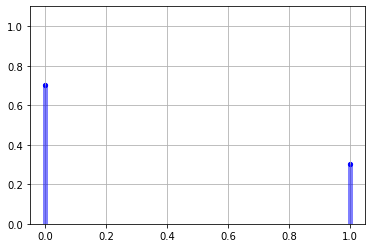

In [50]:
p = 0.3
x = np.linspace(scipy.stats.bernoulli.ppf(0.01, p),
              scipy.stats.bernoulli.ppf(0.99, p),
              num=100)
x = np.array([0, 1])
fig, ax = plt.subplots(1,1)
ax.scatter(x, scipy.stats.bernoulli.pmf(x, p), c='b', marker='o', s=18)
ax.vlines(x, ymin=[0,0], ymax=scipy.stats.bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
ax.set_ylim([0, 1.1])
ax.grid()

In [51]:
# call the distribution object to fix the shape; "frozen" object
my_bern = scipy.stats.bernoulli(p)
type(my_bern)

scipy.stats._distn_infrastructure.rv_frozen

In [54]:
my_bern.pmf(1.0)

0.3

In [58]:
rand_sample = my_bern.rvs(size=1000)

In [61]:
# can also call the class directly
_ = scipy.stats.bernoulli.rvs(p=0.3, size=1000)

Binomial: a sequence of Bernoulli trials.

In [64]:
scipy.stats.binom(n=10, p=0.5).rvs() # 10 coin flips, p = 0.5 for each

Object `rvs` not found.


In [66]:
scipy.stats.multinomial(
    n=10,           # number of trials per data point
    p=[0.5, 0.5]    # probability of each category
    ).rvs(3)

array([[4, 6],
       [7, 3],
       [5, 5]])

In [70]:
# we can implement a categorical dist/choice distribution like this:
categorical_dist = scipy.stats.multinomial(
    n=1,
    p=[0.2,0.5,0.3]
)
categorical_dist.rvs(3)

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [54]:
# alt: define our own class
num_classes = 5
class_probs = np.ones(num_classes) / num_classes
categorical = scipy.stats.rv_discrete(
    values=(range(num_classes), class_probs.T),
    name='categorical'
)

categorical.rvs(size=5)


array([0, 3, 1, 4, 0])

In [57]:
isinstance(categorical, scipy.stats.rv_discrete)

True

In [58]:
issubclass(type(categorical), scipy.stats.rv_discrete)

True

Read about [how to add a new distribution](http://scipy.github.io/devdocs/dev/contributor/adding_new.html#adding-a-new-statistics-distribution).